## EDA Case Study

In [76]:
#importing the required libraries and warnings

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the dataset

In [77]:
# File path stores in a variable so that they can be change
previous_application_path = "../Problem Statement 1/previous_application.csv"
application_data_path = "../Problem Statement 1/application_data.csv"

In [78]:
AppData = pd.read_csv(application_data_path)
AppData.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Inspecting the DataFrame

In [79]:
# Determining the shape of the dataset
AppData.shape

(307511, 122)

In [80]:
AppData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [81]:
#checking the numeric columns summary
AppData.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [82]:
#calculating the null values percentage in the dataset
Null_value = AppData.isnull().sum()/len(AppData)*100
Null_value

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [83]:
# Null Columns
Null_col = Null_value.sort_values(ascending = False)
Null_col = Null_col[Null_col.values > 30]
Null_col

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [84]:
# Function to remove the columns having percentage of null values > 30%
def NullRemoval(AppData,percent=0.30):
    AD = AppData.copy()
    ishape = AD.shape
    colnames = (AD.isnull().sum()/len(AD))
    colnames = list(colnames[colnames.values>=percent].index)
    AD.drop(labels = colnames,axis =1,inplace=True)        
    return AD

In [85]:
#removing the columns having more than 30% null values
AppData = NullRemoval(AppData,percent = 0.30)

In [86]:
#checking the null values again 
null = AppData.isnull().sum()/len(AppData)*100
null.sort_values(ascending = False).head(20)

EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
NAME_TYPE_SUITE                0.420148
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_MOBIL                     0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_WORK_PHONE                0.000000
dtype: float64

## There are various columns where the null value are 13% or up
### Checking the columns and try to see if we can impute the missing values with mean/median/mode

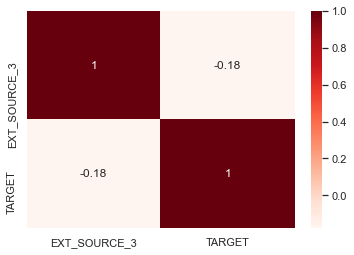

In [87]:
# Checking EXT_SOURCE_3 if it has any correlations with Target variable otherwise we can drop it as it has close 
# to 20% null values

AppData[["EXT_SOURCE_3", "TARGET"]].corr()
sns.heatmap(AppData[["EXT_SOURCE_3", "TARGET"]].corr(), annot=True, cmap="Reds")
plt.show()

In [88]:
#from above heatmap we can see that column "EXT_SOURCE_3" has almost no correlation with target variable so we can drop this

AppData = AppData.drop(columns='EXT_SOURCE_3')

AppData


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,1,1,0,1,0,0,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.681632,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,1,0,0,1,1,0,1.0,2,2,MONDAY,8,0,0,0,0,0,0,XNA,0.115992,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,

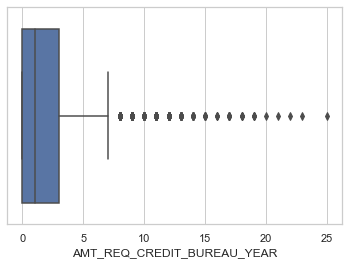

In [89]:
#Taking a look at AMT_REQ_CREDIT_BUREAU_YEAR

sns.boxplot(AppData.AMT_REQ_CREDIT_BUREAU_YEAR)
plt.show()

In [90]:
#The Above plot shows that there are outliers in the AMT_REQ_CREDIT_BUREAU_YEAR and the median lies around 1
# So we will use the Mode to impute the values

Amt_Year_mode = AppData.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0]

Amt_Year_mode

0.0

In [91]:
AppData.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(Amt_Year_mode, inplace=True)
AppData.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts(normalize=True)

0.0     0.368507
1.0     0.206188
2.0     0.163220
3.0     0.109355
4.0     0.067360
5.0     0.039192
6.0     0.022656
7.0     0.012582
8.0     0.006917
9.0     0.003564
11.0    0.000101
12.0    0.000098
10.0    0.000072
13.0    0.000062
14.0    0.000033
17.0    0.000023
15.0    0.000020
19.0    0.000013
18.0    0.000013
16.0    0.000010
21.0    0.000003
23.0    0.000003
25.0    0.000003
20.0    0.000003
22.0    0.000003
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [92]:
AppData.AMT_REQ_CREDIT_BUREAU_YEAR.isnull().sum()

0

## Same process can be done for the columns 
AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_QRT

In [93]:
AMT_COL = ["AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_WEEK" , "AMT_REQ_CREDIT_BUREAU_DAY", 
                   "AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_QRT"]

for x in AMT_COL:
    AppData[x].fillna(AppData[x].mode()[0],inplace = True)

In [94]:
values=AppData['AMT_ANNUITY'].median()

AppData.loc[AppData['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=values

In [95]:
values=AppData['AMT_GOODS_PRICE'].median()

AppData.loc[AppData['AMT_GOODS_PRICE'].isnull(),'AMT_GOODS_PRICE']=values

In [96]:
AppData['NAME_TYPE_SUITE'].fillna((AppData['NAME_TYPE_SUITE'].mode()[0]),inplace = True)

#### We still have few null values in the columns: OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE. We can ignore as this percentage is very less.

In [97]:
AppData.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.005538,0.006055,0.029723,0.231293,0.229631,1.643447
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.910602e-01,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.078014,0.103037,0.190728,0.856810,0.744059,1.855821
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.00

### There are few columns like DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGEwhich have negative values witch is not possible so applying Absolute function on it

In [98]:
# Checking the values present in columns starting with 'DAYS'
AppData[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,-9461,-637,-3648.0,-2120,-1134.0
1,-16765,-1188,-1186.0,-291,-828.0
2,-19046,-225,-4260.0,-2531,-815.0
3,-19005,-3039,-9833.0,-2437,-617.0
4,-19932,-3038,-4311.0,-3458,-1106.0
...,...,...,...,...,...
307506,-9327,-236,-8456.0,-1982,-273.0
307507,-20775,365243,-4388.0,-4090,0.0
307508,-14966,-7921,-6737.0,-5150,-1909.0
307509,-11961,-4786,-2562.0,-931,-322.0


In [99]:
AppData[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']] = abs(AppData[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']])
AppData[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,9461.0,637.0,3648.0,2120.0,1134.0
1,16765.0,1188.0,1186.0,291.0,828.0
2,19046.0,225.0,4260.0,2531.0,815.0
3,19005.0,3039.0,9833.0,2437.0,617.0
4,19932.0,3038.0,4311.0,3458.0,1106.0
...,...,...,...,...,...
307506,9327.0,236.0,8456.0,1982.0,273.0
307507,20775.0,365243.0,4388.0,4090.0,0.0
307508,14966.0,7921.0,6737.0,5150.0,1909.0
307509,11961.0,4786.0,2562.0,931.0,322.0


In [100]:
#converting the DAYS_BIRTH to vget the age in years
AppData.DAYS_BIRTH = (AppData.DAYS_BIRTH/365).astype('int')

AppData.DAYS_BIRTH 

0         25
1         45
2         52
3         52
4         54
          ..
307506    25
307507    56
307508    41
307509    32
307510    46
Name: DAYS_BIRTH, Length: 307511, dtype: int32

In [101]:
# Creating bins for days_birth
bins = [0,20,30,40,50,60,70]
slot = ['0-20','20-30','30-40','40-50','50-60','60-70']

AppData['AGE_RANGE']=pd.cut(AppData['DAYS_BIRTH'],bins,labels=slot)

In [102]:
AppData['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [103]:
#There are some missing vaues in the CODE_GENDER column and the majority consists of Females so we can replcae them with F
AppData.loc[AppData['CODE_GENDER']=='XNA','CODE_GENDER']='F'
AppData['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

## Handling Outliers with Imputation / Binning / Capping / Removing

In [104]:
#Let's take a look at Amount Columns

AppData.AMT_ANNUITY.describe()

count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

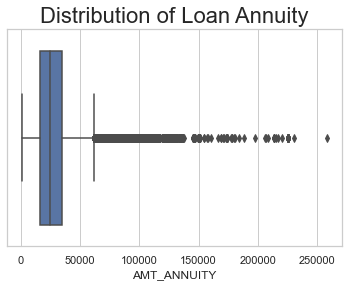

In [105]:
sns.boxplot(AppData.AMT_ANNUITY)
plt.title('Distribution of Loan Annuity')
plt.show()

###  The Above plot shows that there are outliers in the AMT_ANNUITY column witch is at the extreme end and can be removed from analysis

In [106]:
AppData.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

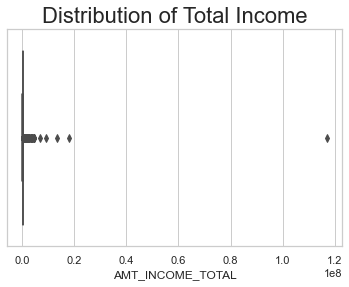

In [107]:
sns.boxplot(AppData.AMT_INCOME_TOTAL)
plt.title('Distribution of Total Income')
plt.show()

#### Total_Income column shows outliers but the income caries from person to person we cannot remove this. It is better to create bins for it.

In [108]:

bins = [0,200000,400000,10000000000]
slot = ['Low','Medium','High']

AppData['AMT_INCOME_RANGE']=pd.cut(AppData['AMT_INCOME_TOTAL'],bins,labels=slot)

In [109]:
AppData.AMT_CREDIT.describe()


count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

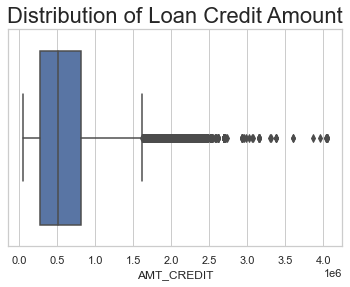

In [110]:
sns.boxplot(AppData.AMT_CREDIT)
plt.title('Distribution of Loan Credit Amount')
plt.show()

In [111]:
#Creating bins for Credit amount

bins = [0,350000,700000,1000000000]
slots = ['Low','Medium','High']

AppData['AMT_CREDIT_RANGE']=pd.cut(AppData['AMT_CREDIT'],bins=bins,labels=slots)


In [112]:
AppData.DAYS_BIRTH.describe()

count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: DAYS_BIRTH, dtype: float64

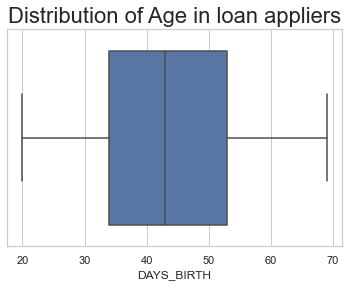

In [113]:
sns.boxplot(AppData.DAYS_BIRTH)
plt.title('Distribution of Age in loan appliers')
plt.show()

#### It seems there is no oulier in DAYS_BIRTH col so we can move ahead

In [114]:
AppData.DAYS_EMPLOYED.describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

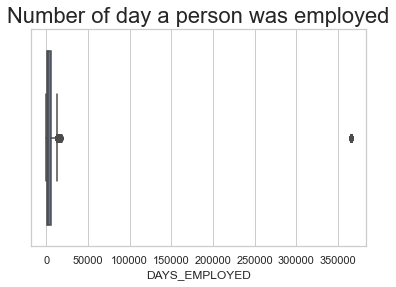

In [115]:
sns.boxplot(AppData.DAYS_EMPLOYED)
plt.title('Number of day a person was employed')
plt.show()

###  A Person can't be employed for 360000 days(approx value) or 986 years which is not possible and has top be removed

# Univariate and Bi-Variate Analysis

In [116]:
AppData.TARGET.value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

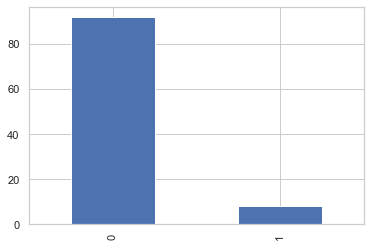

In [117]:
Target = AppData.TARGET.value_counts(normalize = True)*100
Target.plot(kind='bar')
plt.show()

### From looking at the target variable we can see that approx 92% people had no difficulty in loan repaymnet and only 8% people had difficulty in loan repayment

In [118]:
#Dividing the dataset into two different datasets based upon 'Target' variable 
Target_0 = AppData[AppData.TARGET == 0]
Target_1 = AppData[AppData.TARGET == 1]

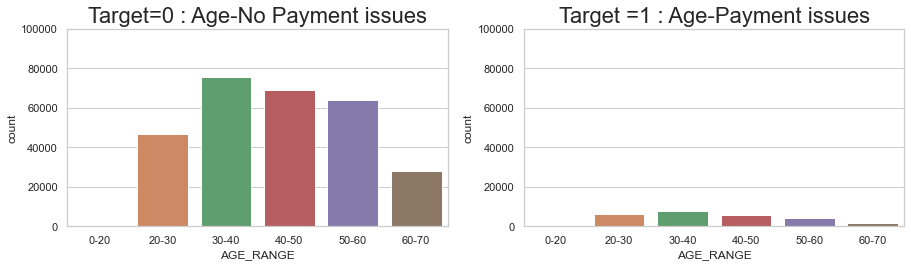

In [119]:
#Let's see which age group can be considered while approving loan
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.ylim(0,100000)
plt.title('Target=0 : Age-No Payment issues')
sns.countplot(Target_0['AGE_RANGE'])

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Target =1 : Age-Payment issues')
plt.ylim(0,100000)
sns.countplot(Target_1['AGE_RANGE'])
plt.show()

### We can observe that customers belonging to age group 30-40 & 40-50 are able to make payment on time and can be considered while lending loan


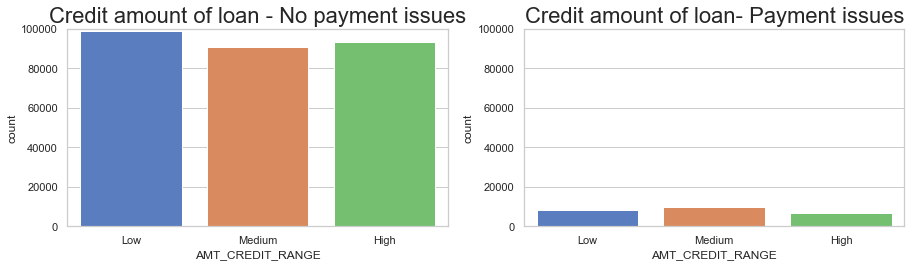

In [120]:
#Let's see if a customer have credit is able to repat the loan or not

plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.ylim(0,100000)
plt.title('Credit amount of loan - No payment issues')
sns.countplot(Target_0['AMT_CREDIT_RANGE'],palette='muted')

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Credit amount of loan- Payment issues')
plt.ylim(0,100000)
sns.countplot(Target_1['AMT_CREDIT_RANGE'], palette='muted')
plt.show()

## Customers with less credit and most likely to make payment. Customers having medium and high credit can also be considered while lending the loan

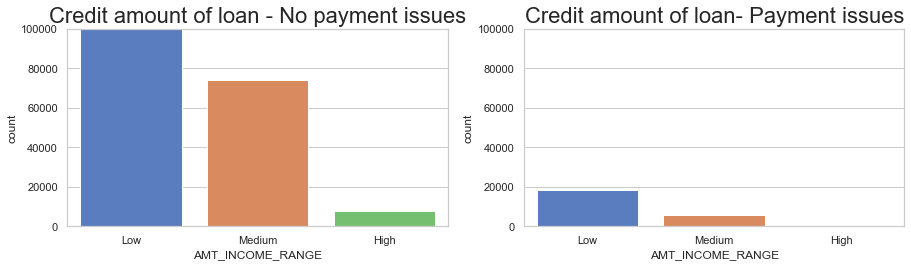

In [121]:
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.ylim(0,100000)
plt.title('Credit amount of loan - No payment issues')
sns.countplot(Target_0['AMT_INCOME_RANGE'],palette='muted')

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Credit amount of loan- Payment issues')
plt.ylim(0,100000)
sns.countplot(Target_1['AMT_INCOME_RANGE'], palette='muted')
plt.show()

# Previous application dataset

In [122]:
#Reading previous_application.csv data and store it in prev_app variable

prev_app = pd.read_csv(previous_application_path)
prev_app.shape

(1670214, 37)

In [123]:
# Looking into the data
pd.options.display.max_columns = None
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
# Checking info and get the column level details i.e. datatype, Count, Name, etc.
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [125]:
# Checking for coulmns which have missing values more than 30%
missingValueCol = prev_app.isnull().mean()*100
missingValueCol = list(missingValueCol[missingValueCol.values>30].index)
missingValueCol

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [126]:
# Dropping those columns from the prev_app dataframe and store it in another dataframe
prev_app_after_drop_col = prev_app.drop(labels=missingValueCol, axis=1)
prev_app_after_drop_col.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [127]:
# Checking for NAME_CASH_LOAN_PURPOSE columns' values
prev_app_after_drop_col["NAME_CASH_LOAN_PURPOSE"].value_counts(normalize=True)*100

# On checking it is found that there are high % of entries with XAP and XNA which has no usedful meaning
# either it has be considered as NA or droping those rows
# As it accures 95% of total rows is better to be considered this as NA

XAP                                 55.242083
XNA                                 40.588691
Repairs                              1.422872
Other                                0.934491
Urgent needs                         0.503648
Buying a used car                    0.172912
Building a house or an annex         0.161237
Everyday expenses                    0.144652
Medicine                             0.130163
Payments on other loans              0.115614
Education                            0.094180
Journey                              0.074182
Purchase of electronic equipment     0.063525
Buying a new car                     0.060591
Wedding / gift / holiday             0.057597
Buying a home                        0.051790
Car repairs                          0.047718
Furniture                            0.044845
Buying a holiday home / land         0.031912
Business development                 0.025506
Gasification / water supply          0.017962
Buying a garage                   

In [128]:
# Let's check the data of XAP and XNA in NAME_CASH_LOAN_PURPOSE column whether it has some logical meaning or not
prev_app_after_drop_col[prev_app_after_drop_col["NAME_CASH_LOAN_PURPOSE"]=="XNA"].NAME_CONTRACT_TYPE.value_counts()
# .NAME_PAYMENT_TYPE.value_counts()

Cash loans    677918
Name: NAME_CONTRACT_TYPE, dtype: int64

In [129]:
prev_app_after_drop_col[prev_app_after_drop_col.NAME_CONTRACT_TYPE=="Cash loans"].NAME_CASH_LOAN_PURPOSE.value_counts()

# XNA is when NAME_CONTRACT_TYPE is Cash loans and data is not available. Thus, it is logical NA value

XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a third person                25
Refusal to 

In [130]:
# Checking for XAP
prev_app_after_drop_col.CODE_REJECT_REASON.value_counts()

XAP       1353093
HC         175231
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
XNA          5244
VERIF        3535
SYSTEM        717
Name: CODE_REJECT_REASON, dtype: int64

In [131]:
prev_app_after_drop_col[prev_app_after_drop_col.CODE_REJECT_REASON=="XAP"]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,315000.0,SATURDAY,8,Y,1,Everyday expenses,Approved,-684,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,267295.5,WEDNESDAY,12,Y,1,XAP,Approved,-544,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,87750.0,TUESDAY,15,Y,1,XAP,Approved,-1694,Cash through the bank,XAP,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,105237.0,MONDAY,12,Y,1,XAP,Approved,-1488,Cash through the bank,XAP,Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,180000.0,WEDNESDAY,9,Y,1,XNA,Approved,-1185,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low


In [132]:
prev_app_after_drop_col[prev_app_after_drop_col.NAME_CASH_LOAN_PURPOSE=="XAP"].NAME_CONTRACT_TYPE.value_counts()

Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

In [133]:
prev_app_after_drop_col[(prev_app_after_drop_col.NAME_CONTRACT_TYPE=='Revolving loans')].NAME_CASH_LOAN_PURPOSE.value_counts()

XAP    193164
Name: NAME_CASH_LOAN_PURPOSE, dtype: int64

In [134]:
prev_app_after_drop_col.groupby(by=["NAME_CONTRACT_TYPE","NAME_CASH_LOAN_PURPOSE"])[["NAME_CASH_LOAN_PURPOSE"]].count()

NAME_CASH_LOAN_PURPOSE
NAME_CONTRACT_TYPE NAME_CASH_LOAN_PURPOSE                                  
Cash loans         Building a house or an annex                        2693
                   Business development                                 426
                   Buying a garage                                      136
                   Buying a holiday home / land                         533
                   Buying a home                                        865
                   Buying a new car                                    1012
                   Buying a used car                                   2888
                   Car repairs                                          797
                   Education                                           1573
                   Everyday expenses                                   2416
                   Furniture                                            749
                   Gasification / water supply                          300
                   Hobby                                                 55
                   Journey                                             1239
                   Medicine                                            2174
                   Money for a third person                              25
                   Other                                              15608
                   Payments on other loans                             1931
                   Purchase of electronic equipment                    1061
                   Refusal to name the goal                              15
                   Repairs                                            23765
                   Urgent needs                                        8412
                   Wedding / gift / holiday                             962
                   XNA                                               677918
Consumer loans     XAP                                               729151
Revolving loans    XAP                                               193164
XNA                XAP                                                  346

##### Based on above analysis, can be conclude below things

- Both XAP and XNA are logical missing values which has their meaning
  - XAP: Logical not applicable
  - XNA: Logical NA
- With above it could be stated that XAP is logical not applicable as CASH_LOAN_PURPOSE is not application for Consumer loans revolving loans

In [135]:
# Sanity Check on AMT_CREDIT
prev_app_after_drop_col[prev_app_after_drop_col.AMT_CREDIT==0].NAME_CONTRACT_STATUS.value_counts()

Canceled        305566
Refused          29159
Approved          1551
Unused offer       492
Name: NAME_CONTRACT_STATUS, dtype: int64

In [136]:
prev_app_after_drop_col[prev_app_after_drop_col.NAME_CONTRACT_STATUS=="Approved"].describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.036781e+06,1.036781e+06,1.036773e+06,1.036781e+06,1.036780e+06,9.939460e+05,1.036781e+06,1.036781e+06,1.036781e+06,1.036781e+06,1.036777e+06
mean,1.903648e+06,2.782418e+05,1.472035e+04,1.805670e+05,2.025642e+05,1.883487e+05,1.261871e+01,9.992891e-01,-1.100759e+03,4.384161e+02,1.412206e+01
std,5.355669e+05,1.027971e+05,1.380235e+04,2.536188e+05,2.753027e+05,2.561813e+05,3.329629e+00,2.665238e-02,7.915365e+02,9.013632e+03,1.196328e+01
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00,0.000000e+00
25%,1.435012e+06,1.892590e+05,5.940360e+03,4.500000e+04,4.797000e+04,4.702500e+04,1.000000e+01,1.000000e+00,-1.642000e+03,-1.000000e+00,6.000000e+00
50%,1.896641e+06,2.784470e+05,1.038024e+04,9.000000e+04,1.022085e+05,9.670950e+04,1.200000e+01,1.000000e+00,-8.620000e+02,3.400000e+01,1.200000e+01
75%,2.368895e+06,3.672990e+05,1.833799e+04,1.963395e+05,2.250000e+05,2.068999e+05,1.500000e+01,1.000000e+00,-4.600000e+02,1.540000e+02,1.800000e+01
max,2.843499e+06,4.562550e+05,3.938687e+05,5.850000e+06,4.509688e+06,5.850000e+06,2.300000e+01,1.000000e+00,-1.000000e+00,4.000000e+06,8.400000e+01


In [137]:
prev_app_after_drop_col[(prev_app_after_drop_col.NAME_CONTRACT_STATUS=="Approved")&
                       ~(prev_app_after_drop_col.AMT_CREDIT>0)].describe()

# There exist 1552 rows where loan status is approved but there is 0 AMT_ANNUITY, AMT_APPLICATION and AMT_CREDIT
# As this is only for revolving loans, assuming that credit card application is consider as loan application where initially
# no amount is credit to customer

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.552000e+03,1552.000000,1552.0,1552.0,1551.0,1368.0,1552.000000,1552.0,1552.000000,1552.000000,1552.0
mean,1.901283e+06,278068.042526,0.0,0.0,0.0,0.0,12.401418,1.0,-385.864046,491.453608,0.0
std,5.335429e+05,102268.469337,0.0,0.0,0.0,0.0,3.376724,0.0,466.737701,1445.101334,0.0
min,1.001409e+06,101136.000000,0.0,0.0,0.0,0.0,2.000000,1.0,-2223.000000,-1.000000,0.0
25%,1.439136e+06,193114.500000,0.0,0.0,0.0,0.0,10.000000,1.0,-384.250000,30.000000,0.0
50%,1.877777e+06,278037.000000,0.0,0.0,0.0,0.0,12.000000,1.0,-251.500000,80.000000,0.0
75%,2.368841e+06,368305.000000,0.0,0.0,0.0,0.0,15.000000,1.0,-130.000000,300.000000,0.0
max,2.843353e+06,456013.000000,0.0,0.0,0.0,0.0,22.000000,1.0,-2.000000,30200.000000,0.0


In [138]:
# prev_app_after_drop_col = prev_app_after_drop_col[~((prev_app_after_drop_col.NAME_CONTRACT_STATUS=="Approved")&
#                                                     ~(prev_app_after_drop_col.AMT_CREDIT>0))]

In [139]:
# prev_app_after_drop_col.shape

In [140]:
# Sanity check on AMT_CREDIT and AMT_APPLICATION
prev_app_after_drop_col[(prev_app_after_drop_col.AMT_APPLICATION < prev_app_after_drop_col.AMT_CREDIT) 
                        & (prev_app_after_drop_col.NAME_CONTRACT_TYPE!="Revolving loans")]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,315000.0,SATURDAY,8,Y,1,Everyday expenses,Approved,-684,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670205,2815130,338803,Cash loans,14584.050,135000.0,182956.5,135000.0,SATURDAY,10,Y,1,XNA,Refused,-1407,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,100,XNA,24.0,high,Cash Street: high
1670206,2459206,238591,Cash loans,19401.435,180000.0,243936.0,180000.0,TUESDAY,13,Y,1,Purchase of electronic equipment,Approved,-1833,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,100,XNA,24.0,high,Cash Street: high
1670208,1556789,209732,Cash loans,22299.390,315000.0,436216.5,315000.0,THURSDAY,17,Y,1,XNA,Approved,-1279,Cash through the bank,XAP,Refreshed,XNA,Cash,x-sell,Credit and cash offices,100,XNA,36.0,middle,Cash X-Sell: middle
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,267295.5,WEDNESDAY,12,Y,1,XAP,Approved,-544,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest


 - Bank never sanction loan higher than the request amount. Here, we found 600968 rows of data where AMT_CREDIT (loan saction amount) is higher than AMT_APPLICATION (amount requested for loan). Hence, this is not appropriate data.
 - In case of NAME_CONTRACT_TYPE = Revolving loan, assuming that credit card has a sanction limit which is not in scope of this assignment and while purchasing a product AMT_APPLICATION is 0 and AMT_CREDIT is greater than 0 and less than its limit.

<b>Overall Conclusion:</b> Dropping such data where AMT_CREDIT (loan saction amount) is higher than AMT_APPLICATION (amount requested for loan) except data where NAME_CONTRACT_TYPE = Revolving loan.

In [141]:
prev_app_after_drop_col = prev_app_after_drop_col[~((prev_app_after_drop_col.AMT_APPLICATION < 
                                                     prev_app_after_drop_col.AMT_CREDIT) 
                                                    & (prev_app_after_drop_col.NAME_CONTRACT_TYPE!="Revolving loans"))]
prev_app_after_drop_col.shape

(1069246, 26)

In [142]:
# Sanity check on week days
prev_app_after_drop_col.WEEKDAY_APPR_PROCESS_START.value_counts()

WEDNESDAY    162309
TUESDAY      161766
FRIDAY       160431
MONDAY       160258
THURSDAY     158867
SATURDAY     155068
SUNDAY       110547
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

In [143]:
# Sanity check on hours
prev_app_after_drop_col.HOUR_APPR_PROCESS_START.value_counts(sort=False)

0         89
1        153
2        777
3       3117
4       5641
5       9225
6      15533
7      27316
8      43902
9      78200
10    111605
11    120054
12    117886
13    110853
14    102628
15     93907
16     81121
17     64457
18     44025
19     24105
20     10734
21      3147
22       589
23       182
Name: HOUR_APPR_PROCESS_START, dtype: int64

#### Univariate Analysis

In [144]:
def univariateAnalysis(df, includeDtype='number', excludeDtype=None, figSize=[10, 5], colNames=None, style="whitegrid"):
    if colNames is None:
        colNames = list(df.columns)
    if not isinstance(colNames, list):
        print(colNames + " is not a list")
        return
    if not isinstance(df, pd.DataFrame):
        print(df + " is not a Dataframe")
        return
    for col in list(df[colNames].select_dtypes(include=includeDtype, exclude=excludeDtype).columns):
        print("Analysis for " + col)
        print("")
        plt.figure(figsize=figSize)
        sns.set(style=style)
        if includeDtype == 'number':
            print(pd.DataFrame(df[col].describe().apply(lambda x: format(x, 'f'))))
            sns.boxplot(df[col], orient="v")
            plt.title("Box plot for " + col)
        else:
            plot = sns.countplot(df[col])
            plt.title("Title plot for " + col)
            plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
        plt.show()

Analysis for AMT_ANNUITY

         AMT_ANNUITY
count  697014.000000
mean    12130.991019
std     11511.541241
min         0.000000
25%      4973.388750
50%      8796.982500
75%     14714.235000
max    393868.665000


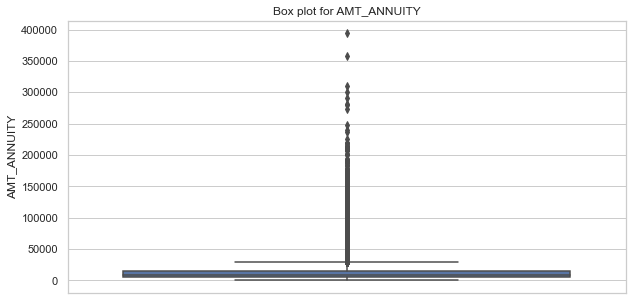

Analysis for AMT_APPLICATION

      AMT_APPLICATION
count  1069246.000000
mean    104726.068911
std     219460.233436
min          0.000000
25%          0.000000
50%      40414.365000
75%     109332.000000
max    6905160.000000


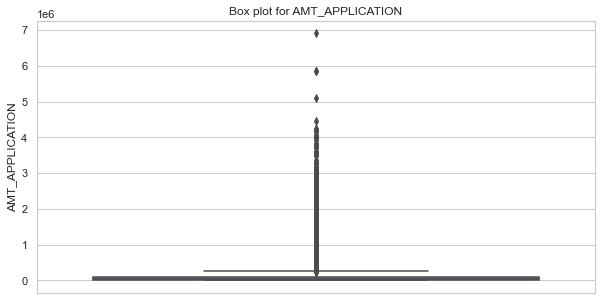

Analysis for AMT_CREDIT

           AMT_CREDIT
count  1069245.000000
mean    114847.709671
std     223488.465628
min          0.000000
25%          0.000000
50%      45000.000000
75%     121117.500000
max    6905160.000000


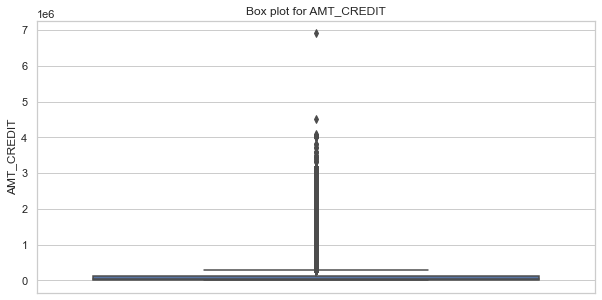

Analysis for AMT_GOODS_PRICE

      AMT_GOODS_PRICE
count   683731.000000
mean    163829.130578
std     256275.531004
min          0.000000
25%      44950.500000
50%      81288.000000
75%     161919.000000
max    6905160.000000


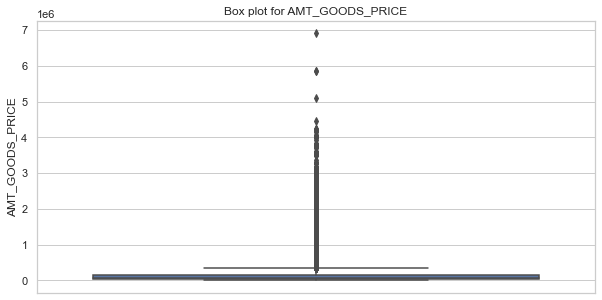

Analysis for DAYS_DECISION

        DAYS_DECISION
count  1069246.000000
mean      -904.835893
std        853.485987
min      -2922.000000
25%      -1464.000000
50%       -495.000000
75%       -246.000000
max         -1.000000


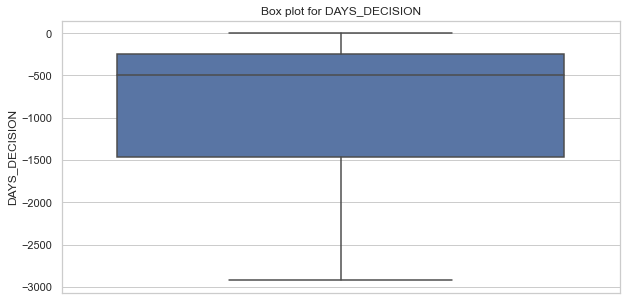

Analysis for CNT_PAYMENT

         CNT_PAYMENT
count  697016.000000
mean       11.139166
std        12.014655
min         0.000000
25%         6.000000
50%        10.000000
75%        12.000000
max        84.000000


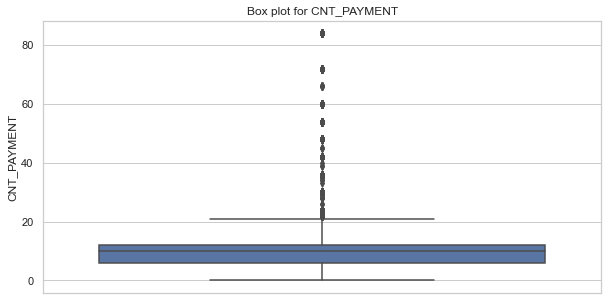

In [145]:
colNames = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_DECISION','CNT_PAYMENT']
univariateAnalysis(prev_app_after_drop_col, colNames=colNames)

<b>Conclusion:</b>
 - There are Outliers in Amount columns i.e. AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE and CNT_PAYMENT
 - All outliers are acceptable as there is possibility that a loan requester is high salaried or income person thus, it allows him/her for high annuity, high application amount, high credit, high goods price and payment count as well.

Analysis for NAME_CONTRACT_TYPE



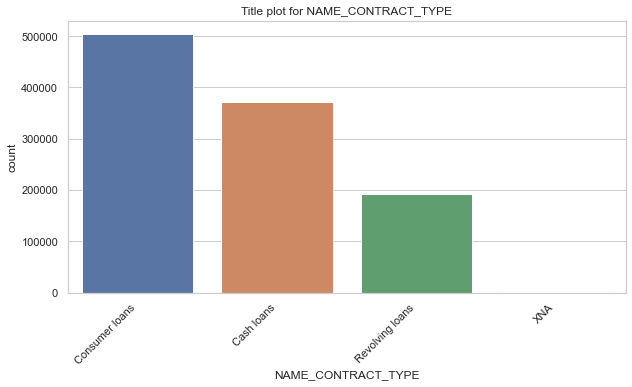

Analysis for WEEKDAY_APPR_PROCESS_START



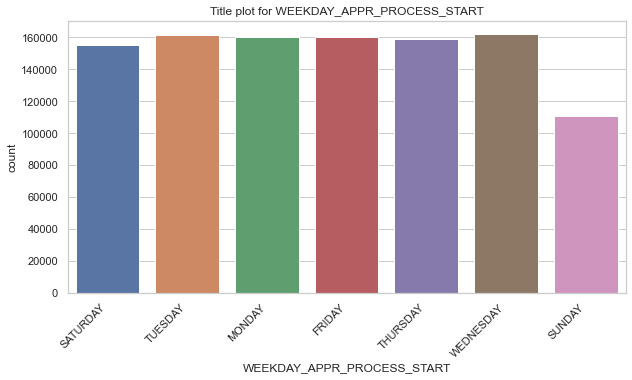

Analysis for FLAG_LAST_APPL_PER_CONTRACT



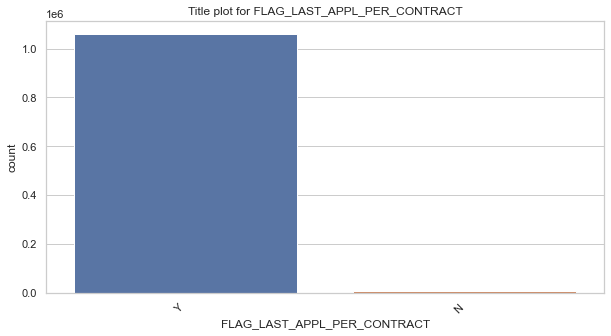

Analysis for NAME_CASH_LOAN_PURPOSE



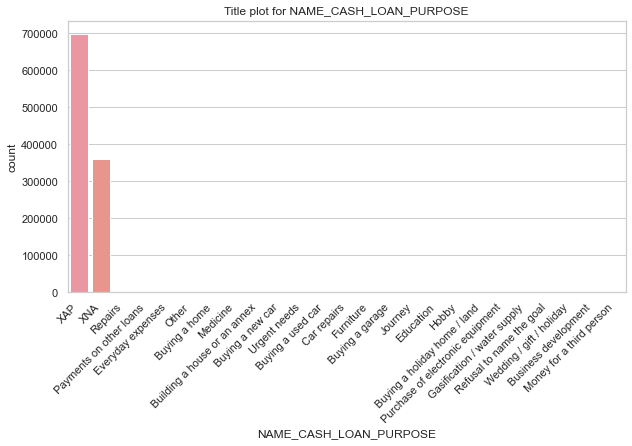

Analysis for NAME_CONTRACT_STATUS



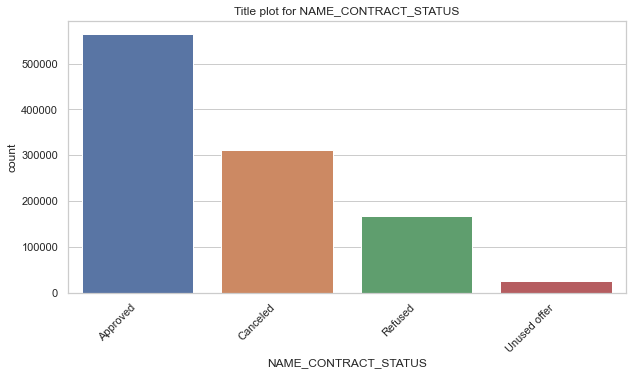

Analysis for NAME_PAYMENT_TYPE



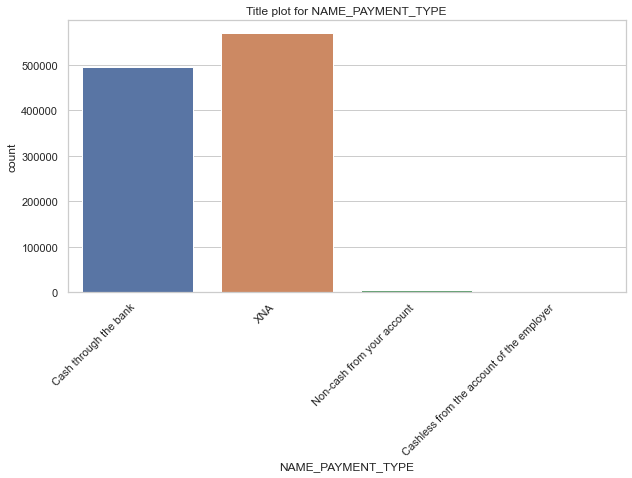

Analysis for CODE_REJECT_REASON



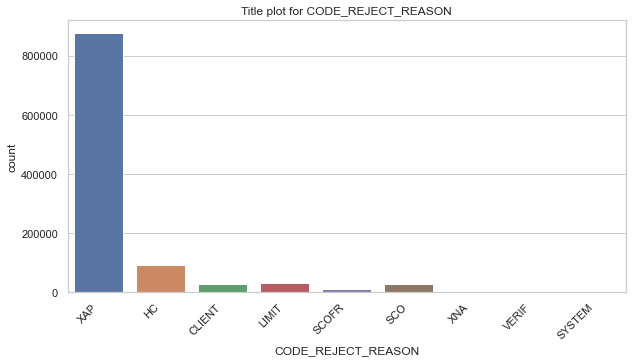

Analysis for NAME_CLIENT_TYPE



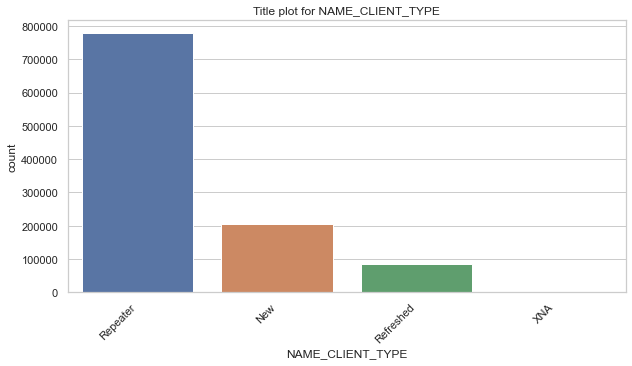

Analysis for NAME_GOODS_CATEGORY



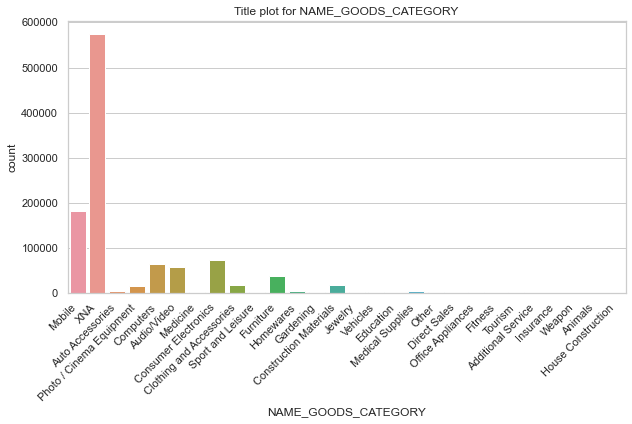

Analysis for NAME_PORTFOLIO



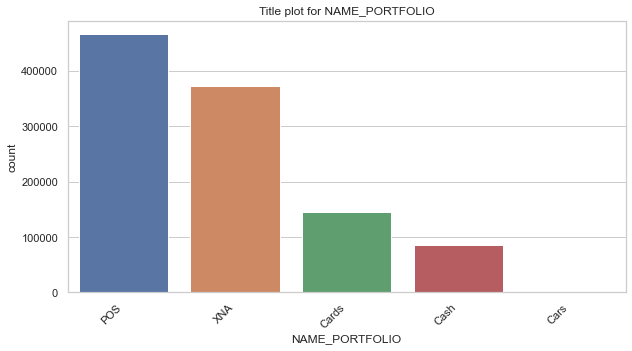

Analysis for NAME_PRODUCT_TYPE



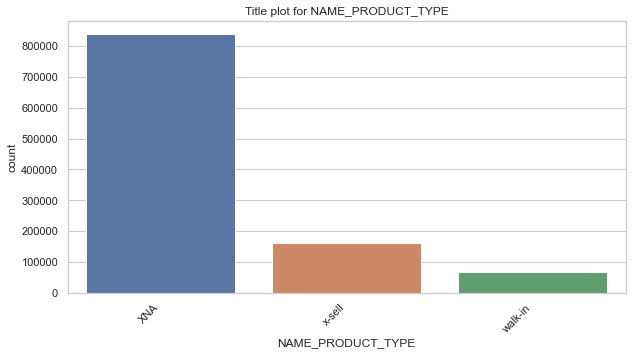

Analysis for CHANNEL_TYPE



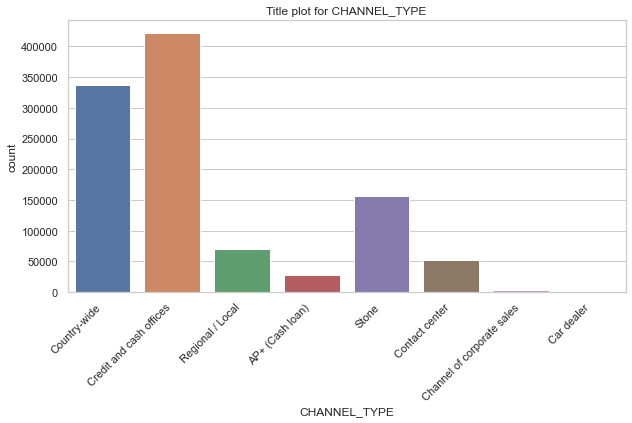

Analysis for NAME_SELLER_INDUSTRY



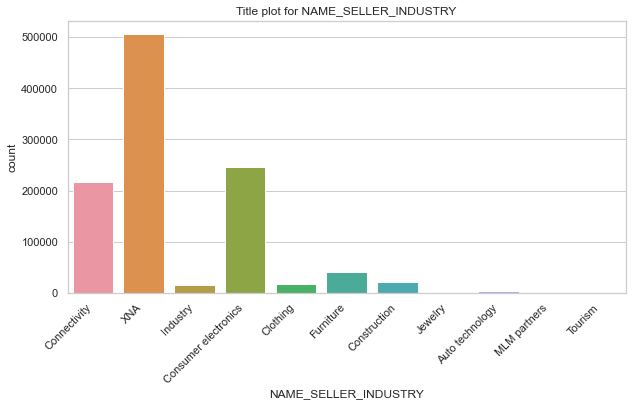

Analysis for NAME_YIELD_GROUP



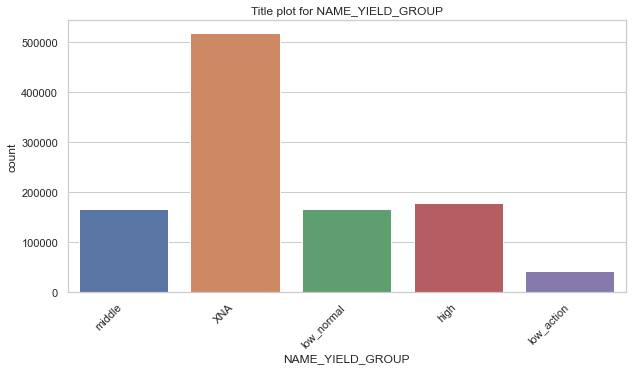

Analysis for PRODUCT_COMBINATION



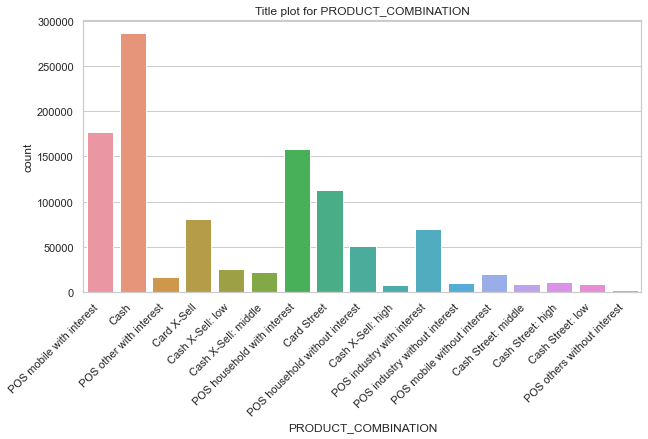

In [146]:
colNames = list(prev_app_after_drop_col.select_dtypes(include='object'))
univariateAnalysis(prev_app_after_drop_col, includeDtype='object',colNames=colNames)

<b>Conclusion:</b>
 - 

#### Bivariate Analysis

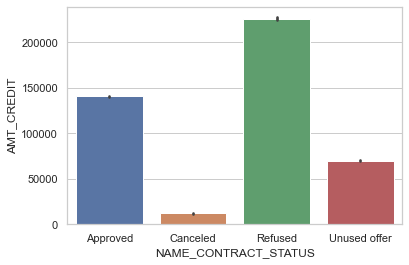

In [147]:
sns.set(style="whitegrid")
plot = sns.barplot(x="NAME_CONTRACT_STATUS", y="AMT_CREDIT", data=prev_app_after_drop_col)
# plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

<b>Conclusion</b>
 - There is high change that loan application got refused or reject if the previous loan credit amount is higher

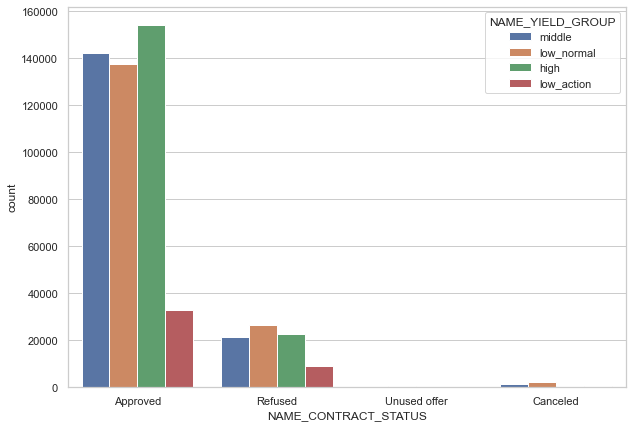

In [148]:
plt.figure(figsize=[10,7])
sns.countplot(x="NAME_CONTRACT_STATUS", 
              hue="NAME_YIELD_GROUP", 
              data=prev_app_after_drop_col[prev_app_after_drop_col.NAME_YIELD_GROUP!="XNA"])
plt.show()

<b>Conclusion:</b> 
 - high grouped interest rate has maximum number of approved loans
 - low action grouped interest rate has least number of approved loans
 - In medium and low normal grouped interest rate, there are records with cancelled status which means if interest rate falls under medium or low normal group then there is chance that user cancel the loan application

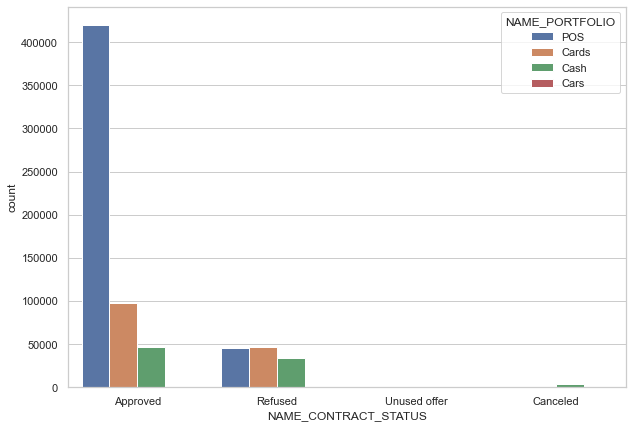

In [149]:
plt.figure(figsize=[10,7])
sns.countplot(x="NAME_CONTRACT_STATUS", 
              hue="NAME_PORTFOLIO",
              data=prev_app_after_drop_col[prev_app_after_drop_col.NAME_PORTFOLIO!="XNA"])
plt.show()

<b>Conclusion:</b>
 - There is high chance of approving the loan application, if the previous application is POS.

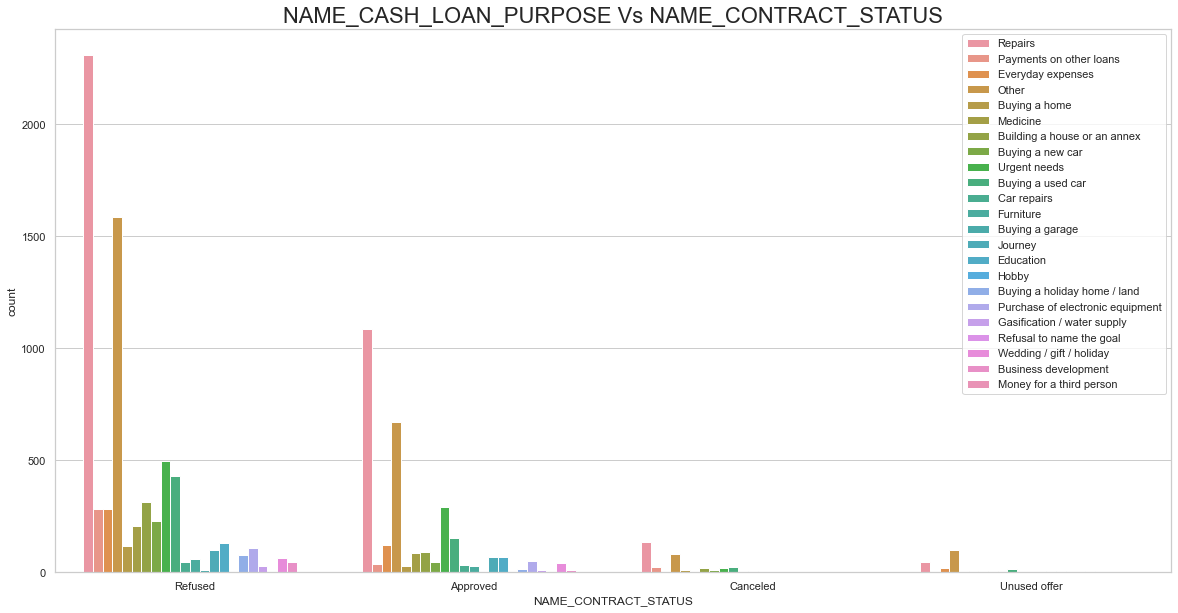

In [150]:
plt.figure(figsize=[20,10])
sns.countplot(x="NAME_CONTRACT_STATUS", 
              hue="NAME_CASH_LOAN_PURPOSE",
              data=prev_app_after_drop_col[~prev_app_after_drop_col.NAME_CASH_LOAN_PURPOSE.isin(["XNA","XAP"])])
plt.rcParams['axes.titlesize'] = 22
plt.title("NAME_CASH_LOAN_PURPOSE Vs NAME_CONTRACT_STATUS")
plt.legend(loc='upper right')
plt.show()

In [152]:
AppData.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCI

In [40]:
AppData.TARGET.value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

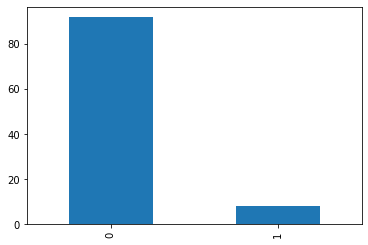

In [41]:
Target = AppData.TARGET.value_counts(normalize = True)*100
Target.plot(kind='bar')
plt.show()

### From looking at the target variable we can see that approx 92% people had no difficulty in loan repaymnet and only 8% people had difficulty in loan repayment

In [42]:
#Dividing the dataset into two different datasets based upon 'Target' variable 
Target_0 = AppData[AppData.TARGET == 0]
Target_1 = AppData[AppData.TARGET == 1]

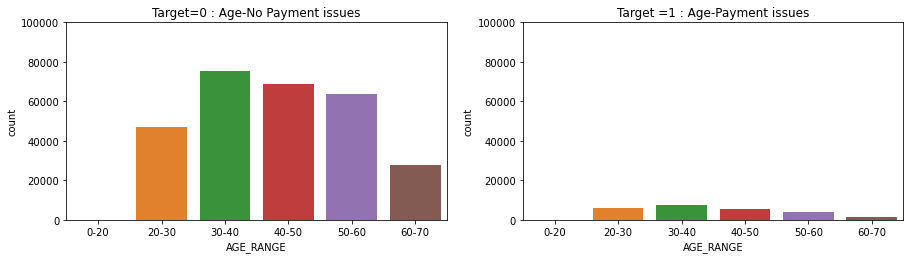

In [43]:
#Let's see which age group can be considered while approving loan
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.ylim(0,100000)
plt.title('Target=0 : Age-No Payment issues')
sns.countplot(Target_0['AGE_RANGE'])

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Target =1 : Age-Payment issues')
plt.ylim(0,100000)
sns.countplot(Target_1['AGE_RANGE'])
plt.show()

### We can observe that customers belonging to age group 30-40 & 40-50 are able to make payment on time and can be considered while lending loan


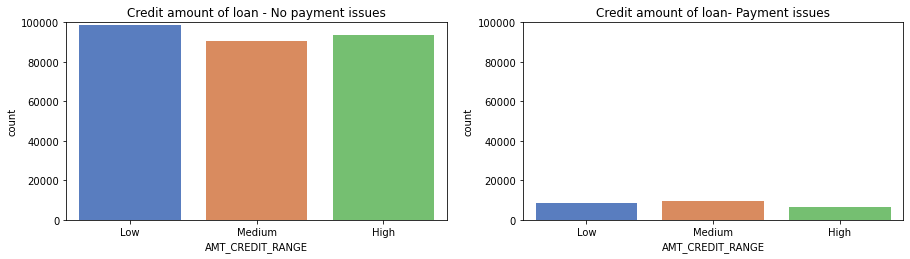

In [44]:
#Let's see if a customer have credit is able to repat the loan or not

plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.ylim(0,100000)
plt.title('Credit amount of loan - No payment issues')
sns.countplot(Target_0['AMT_CREDIT_RANGE'],palette='muted')

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Credit amount of loan- Payment issues')
plt.ylim(0,100000)
sns.countplot(Target_1['AMT_CREDIT_RANGE'], palette='muted')
plt.show()

## Customers with less credit and most likely to make payment. Customers having medium and high credit can also be considered while lending the loan

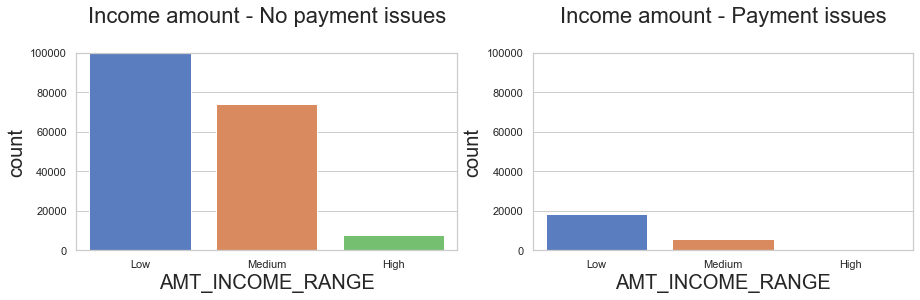

In [169]:
#checking if income range is helpful in determing the loan repayment
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.ylim(0,100000)
plt.title('Income amount - No payment issues')
sns.countplot(Target_0['AMT_INCOME_RANGE'],palette='muted')

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Income amount - Payment issues')
plt.ylim(0,100000)
sns.countplot(Target_1['AMT_INCOME_RANGE'], palette='muted')
plt.show()

## as majority lies in low income range the stats shows that people from low-income range are able to repay the loan as compared to mid/high

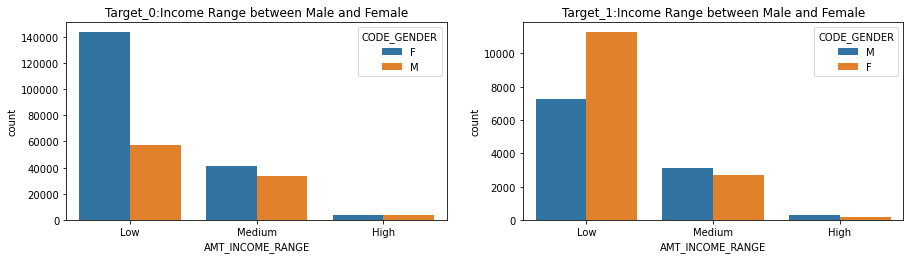

In [50]:
#Income_Range & Gender VS Target Variable

plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.title('Target_0:Income Range between Male and Female')

sns.countplot(x='AMT_INCOME_RANGE', hue='CODE_GENDER', data=Target_0)

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Target_1:Income Range between Male and Female')

sns.countplot(x='AMT_INCOME_RANGE', hue='CODE_GENDER', data=Target_1)
plt.show()

#### Females with low income does not have payment issues

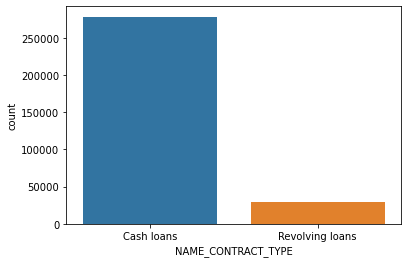

In [60]:

# Checking the contract type based on loan repayment status

sns.countplot(data=AppData.TARGET, x=AppData['NAME_CONTRACT_TYPE'])
plt.show()

## Revolving loans are just a small fraction from the total number of loans and are less repaid as compaired to Cash Loans

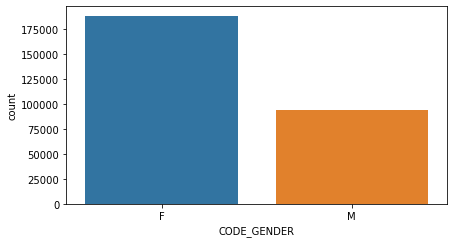

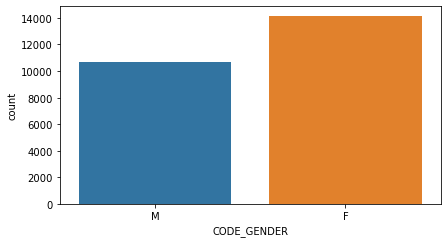

In [71]:
# Checking the Gender type based on loan repayment status
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
sns.countplot(data=Target_0, x=Target_0['CODE_GENDER'])
plt.show()

plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 2)
sns.countplot(data=Target_1, x=Target_1['CODE_GENDER'])
plt.show()

### The number of female clients is almost double the number of male clients. 
### Based on the percentage of defaulted credits, males have a higher chance of not returning their loans as compared with women 

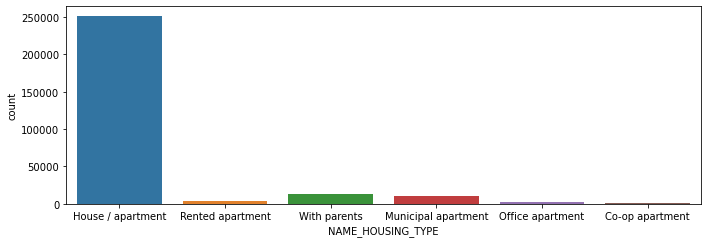

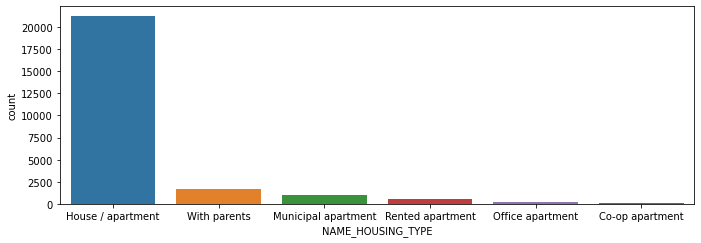

In [70]:
# Checking the Housing type based on loan repayment status
plt.figure(figsize = (25,8))
plt.subplot(2, 2, 1)
sns.countplot(data=Target_0, x=Target_0['NAME_HOUSING_TYPE'])
plt.show()

plt.figure(figsize = (25, 8))
plt.subplot(2, 2, 2)
sns.countplot(data=Target_1, x=Target_1['NAME_HOUSING_TYPE'])
plt.show()

###  Majority of people live in House/apartment
### People living in office apartments have lowest default rate

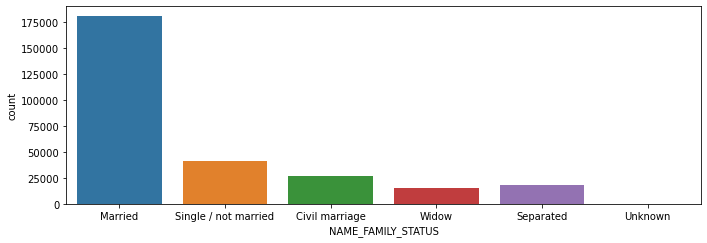

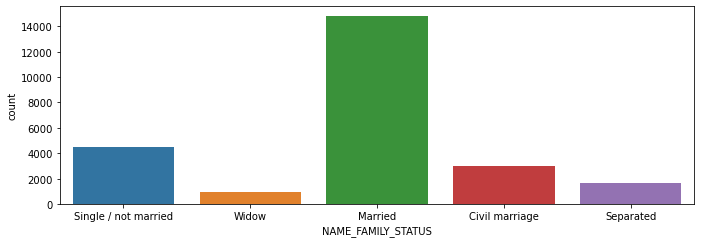

In [72]:
# Checking the Family Status type based on loan repayment status
plt.figure(figsize = (25,8))
plt.subplot(2, 2, 1)
sns.countplot(data=Target_0, x=Target_0['NAME_FAMILY_STATUS'])
plt.show()

plt.figure(figsize = (25, 8))
plt.subplot(2, 2, 2)
sns.countplot(data=Target_1, x=Target_1['NAME_FAMILY_STATUS'])
plt.show()

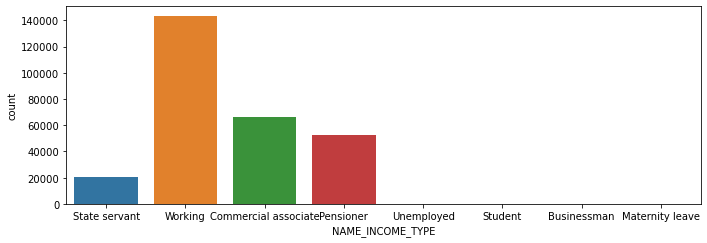

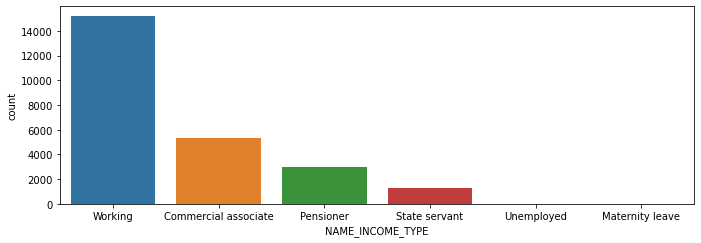

In [73]:
# Checking the Income Type based on loan repayment status
plt.figure(figsize = (25,8))
plt.subplot(2, 2, 1)
sns.countplot(data=Target_0, x=Target_0['NAME_INCOME_TYPE'])
plt.show()

plt.figure(figsize = (25, 8))
plt.subplot(2, 2, 2)
sns.countplot(data=Target_1, x=Target_1['NAME_INCOME_TYPE'])
plt.show()

### Most of applicants for loans have income type as Working, followed by Commercial associate, Pensioner and State servant.
### Student and Businessmen, though less in numbers do not have any default record. 
### Thus these two category are safest for providing loan.

# Merging Application dataset and previous dataset

In [155]:
combined_app_data = pd.merge(left=AppData,right=prev_app_after_drop_col,how='inner',on='SK_ID_CURR', suffixes=('_app', '_pa'))
combined_app_data.shape

(902853, 99)

In [156]:
combined_app_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902853 entries, 0 to 902852
Data columns (total 99 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   SK_ID_CURR                      902853 non-null  int64   
 1   TARGET                          902853 non-null  int64   
 2   NAME_CONTRACT_TYPE_app          902853 non-null  object  
 3   CODE_GENDER                     902853 non-null  object  
 4   FLAG_OWN_CAR                    902853 non-null  object  
 5   FLAG_OWN_REALTY                 902853 non-null  object  
 6   CNT_CHILDREN                    902853 non-null  int64   
 7   AMT_INCOME_TOTAL                902853 non-null  float64 
 8   AMT_CREDIT_app                  902853 non-null  float64 
 9   AMT_ANNUITY_app                 902853 non-null  float64 
 10  AMT_GOODS_PRICE_app             902853 non-null  float64 
 11  NAME_TYPE_SUITE                 902853 non-null  object  
 12  NA

In [159]:
# Finding and dropping unnecessary columns
unnecessary_columns = ['FLAG_OWN_CAR','FLAG_MOBIL','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
                       'FLAG_PHONE','FLAG_EMAIL','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
                       'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE',
                       'FLAG_DOCUMENT_2','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',
                       'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12',
                       'FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17',
                       'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','SELLERPLACE_AREA']
combined_app_data.drop(columns=unnecessary_columns, inplace=True)
combined_app_data.shape

(902853, 67)

In [160]:
combined_app_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902853 entries, 0 to 902852
Data columns (total 67 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   SK_ID_CURR                      902853 non-null  int64   
 1   TARGET                          902853 non-null  int64   
 2   NAME_CONTRACT_TYPE_app          902853 non-null  object  
 3   CODE_GENDER                     902853 non-null  object  
 4   FLAG_OWN_REALTY                 902853 non-null  object  
 5   CNT_CHILDREN                    902853 non-null  int64   
 6   AMT_INCOME_TOTAL                902853 non-null  float64 
 7   AMT_CREDIT_app                  902853 non-null  float64 
 8   AMT_ANNUITY_app                 902853 non-null  float64 
 9   AMT_GOODS_PRICE_app             902853 non-null  float64 
 10  NAME_TYPE_SUITE                 902853 non-null  object  
 11  NAME_INCOME_TYPE                902853 non-null  object  
 12  NA

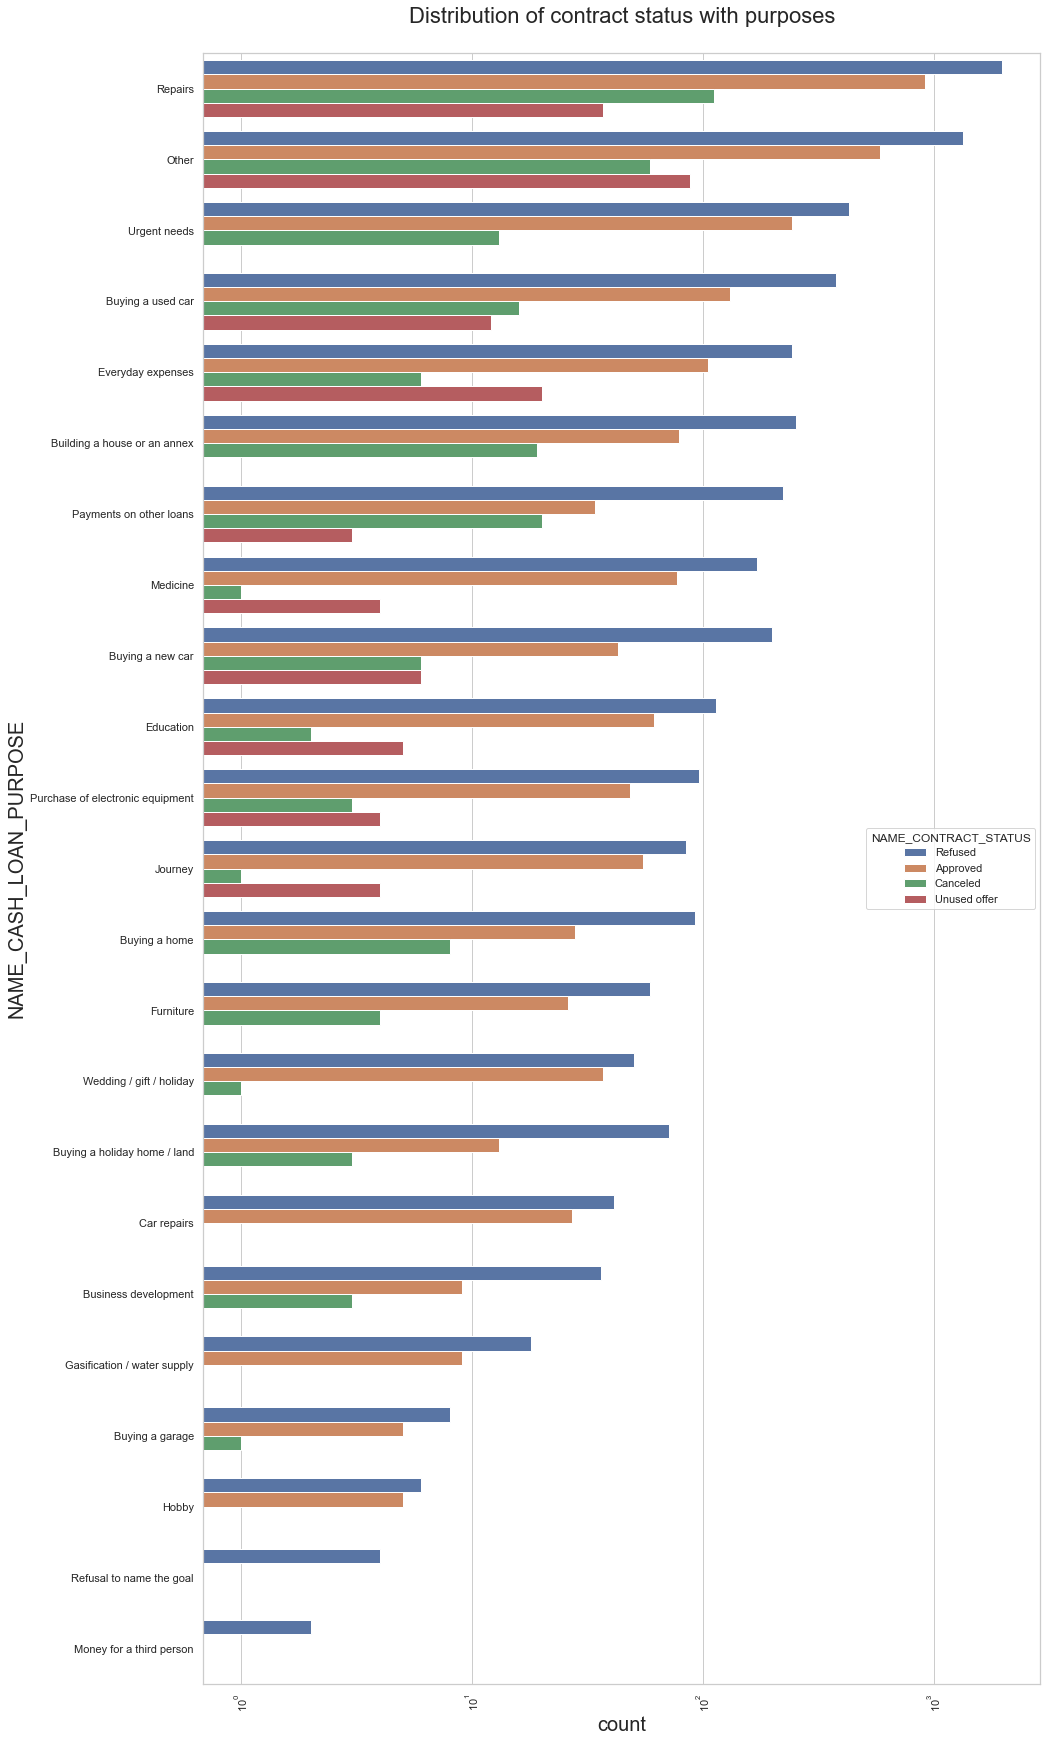

In [167]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = combined_app_data[~combined_app_data.NAME_CASH_LOAN_PURPOSE.isin(["XAP", "XNA"])], 
                   y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=combined_app_data[~combined_app_data.NAME_CASH_LOAN_PURPOSE.isin(["XAP", "XNA"])].NAME_CASH_LOAN_PURPOSE.value_counts().index,
                   hue = 'NAME_CONTRACT_STATUS') 

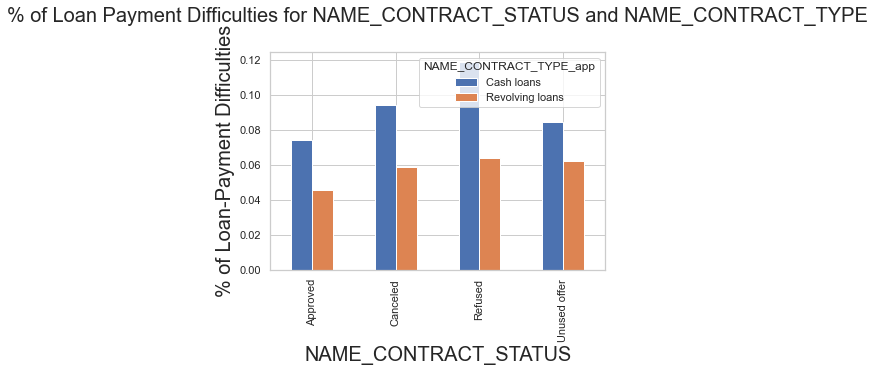

In [172]:
table = pd.pivot_table(combined_app_data, values='TARGET', index=['NAME_CONTRACT_TYPE_app'],columns=['NAME_CONTRACT_STATUS'], aggfunc=np.mean)

ax = table.T.plot(kind='bar')
ylab = ax.set_ylabel('% of Loan-Payment Difficulties')
plt.title('% of Loan Payment Difficulties for NAME_CONTRACT_STATUS and NAME_CONTRACT_TYPE', fontdict={'fontsize':20})
plt.show()

 - Percentage of rejection is high in cash loans
 - Percentage of approved loan for revolving loan is comparatively less.